## Exploring Places

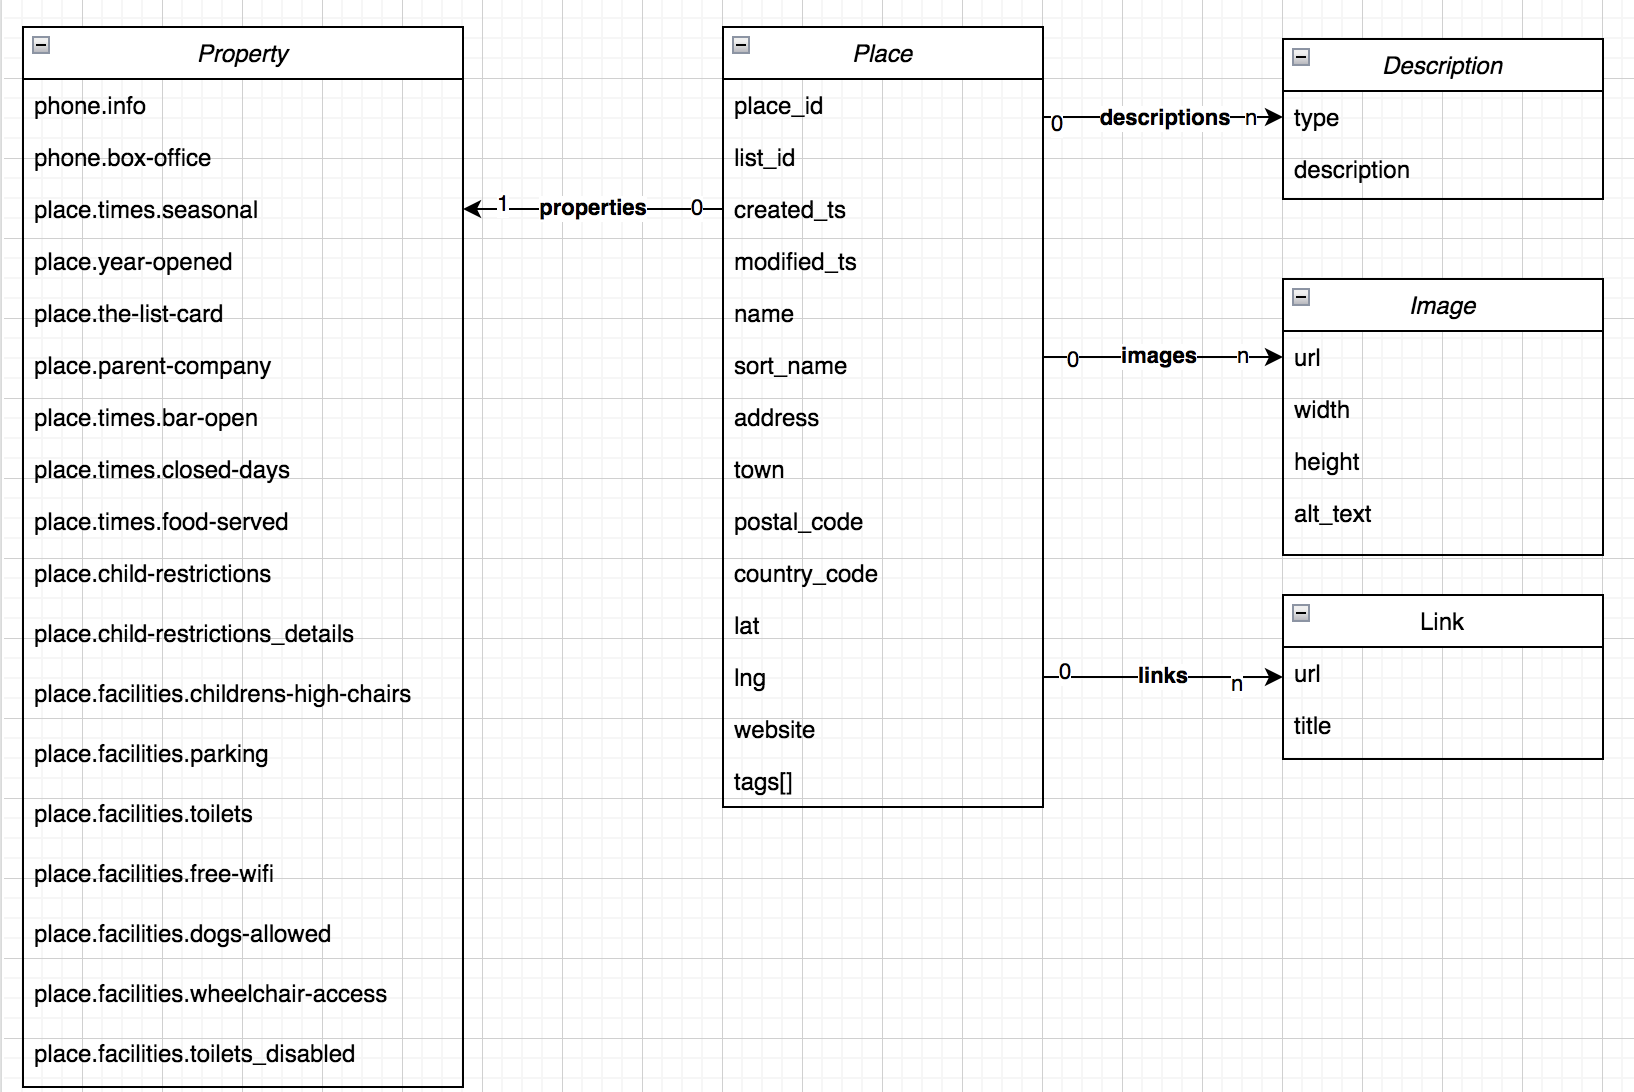

### 1. Importing libraries and loading the json file with 5000 events to a dataframe

In [1]:
import json
import pandas as pd
import plotly.express as px
import os
import plotly.graph_objects as go
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
with open('places_100.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)

### 2. Visualizing the places dataframe

In [3]:
df

,place_id,list_id,created_ts,modified_ts,name,sort_name,address,town,postal_code,country_code,lat,lng,tags,descriptions,properties,website,links,images
0,1a8fdadd-4f1e-b60e-13e0-bcc4000028af,10415,2000-02-05T00:00:00,2000-02-05T00:00:00,Princess Royal & Duke of Fife Memorial Park,Princess Royal & Duke of Fife Memorial Park,Broombank Terrace,Braemar,AB35 5YX,GB,57.00520,-3.40440,[parks],[],{},NaN,NaN,NaN
1,1ed0eadd-4f1e-b60e-36e0-bcc400002980,10624,2000-03-03T00:00:00,2000-03-03T00:00:00,City Centre,City Centre (Glasgow),NaN,Glasgow,G1,GB,55.88330,-4.25000,[],[],{'phone.info': '0141 204 4400'},NaN,NaN,NaN
2,7161eadd-4f1e-b60e-d6e0-bcc400002917,10519,2000-04-06T23:00:00,2000-04-06T23:00:00,Charlotte Toal Centre,Charlotte Toal Centre,Dundyvan Road,Coatbridge,ML5 1DB,GB,55.85730,-4.03413,[town & village halls],[],{'phone.info': '01698 267515'},NaN,NaN,NaN
3,f160eadd-4f1e-b60e-a5e0-bcc40000275b,10075,2000-06-21T23:00:00,2000-06-21T23:00:00,Linlithgow Primary School,Linlithgow Primary School,Preston Road,Linlithgow,EH49 6EH,GB,55.97162,-3.61258,[schools],[],{},NaN,NaN,NaN
4,8fbfdadd-4f1e-b60e-83e0-bcc400002c5c,11356,2000-07-09T23:00:00,2000-07-09T23:00:00,Tait Hall,Tait Hall,Edenside Road,Kelso,TD5 7BS,GB,55.60140,-2.43025,[town & village halls],[],{'phone.info': '01573 224233'},NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,00005a86-5b42-bb9a-c729-d6050000b7fe,47102,2012-10-04T13:43:24,2012-10-04T14:56:04,North Walls Recreation Ground,North Walls Recreation Ground,,Winchester,SO23 7DD,GB,51.06545,-1.31210,"[outdoors, parks]",[],{},NaN,NaN,NaN
96,0000b182-f942-bb9a-33be-37050000c1d5,49621,2012-10-09T09:15:31,2012-10-09T12:32:24,Newick Village,Newick Village,,Lewes,,GB,50.97525,0.01480,"[outdoors, village]",[],{},http://www.newick.net/,NaN,NaN
97,c5bfdadd-4f1e-b60e-73e0-bcc400002920,10528,2002-05-05T23:00:00,2012-10-10T11:28:01,The Cinema,Cinema: Newton Stewart,33--35 Victoria Street,Newton Stewart,DG8 6NL,GB,54.95880,-4.48262,[cinemas],"[{'type': 'default', 'description': 'Run on a ...",{'phone.info': '01671 403373'},http://www.nscinema.co.uk,NaN,NaN
98,558fdadd-4f1e-b60e-03e0-bcc4000030bf,12479,2001-10-25T23:00:00,2012-10-10T11:36:09,The Pavilion,Pavilion: Galashiels,Market Street,Galashiels,TD1 3AF,GB,55.61570,-2.80571,[cinemas],"[{'type': 'default', 'description': 'First ope...",{},http://www.pavilioncinema.co.uk,NaN,NaN


In [4]:
df.shape[0]

100

###  Experiment 1: Exploring Place Ids

In [5]:
df_ids=df.groupby(['place_id']).size().reset_index()
df_ids=df_ids.rename(columns={0: "number_of_times"}).sort_values(by=['number_of_times'], ascending=False)
df_ids

,place_id,number_of_times
0,00000322-2842-bb9a-e74e-0dd400007687,1
63,63c0eadd-4f1e-b60e-16e0-bcc400005c32,1
73,8cb7eadd-4f1e-b60e-93ea-5fc40131612c,1
72,8c04eadd-4f1e-b60e-f8e0-bcc401315121,1
71,8b20eadd-4f1e-b60e-65e0-bcc400003c3c,1
...,...,...
30,0000b307-0f42-bb9a-5f60-7df40000afc5,1
29,0000b182-f942-bb9a-33be-37050000c1d5,1
28,0000a786-3b42-bb9a-0825-c6050000b7eb,1
27,0000a574-7942-bb9a-77c7-d0f4000083ff,1


### Experiment 2: Exploring Tags Events

We are going to separete the elements stored in each tag list into new rows. 


In [6]:
df["tags"][0:5]

0                   [parks]
1                        []
2    [town & village halls]
3                 [schools]
4    [town & village halls]
Name: tags, dtype: object

In [7]:
df_tags=df.explode('tags')

In [8]:
df_tags

,place_id,list_id,created_ts,modified_ts,name,sort_name,address,town,postal_code,country_code,lat,lng,tags,descriptions,properties,website,links,images
0,1a8fdadd-4f1e-b60e-13e0-bcc4000028af,10415,2000-02-05T00:00:00,2000-02-05T00:00:00,Princess Royal & Duke of Fife Memorial Park,Princess Royal & Duke of Fife Memorial Park,Broombank Terrace,Braemar,AB35 5YX,GB,57.00520,-3.40440,parks,[],{},NaN,NaN,NaN
1,1ed0eadd-4f1e-b60e-36e0-bcc400002980,10624,2000-03-03T00:00:00,2000-03-03T00:00:00,City Centre,City Centre (Glasgow),NaN,Glasgow,G1,GB,55.88330,-4.25000,NaN,[],{'phone.info': '0141 204 4400'},NaN,NaN,NaN
2,7161eadd-4f1e-b60e-d6e0-bcc400002917,10519,2000-04-06T23:00:00,2000-04-06T23:00:00,Charlotte Toal Centre,Charlotte Toal Centre,Dundyvan Road,Coatbridge,ML5 1DB,GB,55.85730,-4.03413,town & village halls,[],{'phone.info': '01698 267515'},NaN,NaN,NaN
3,f160eadd-4f1e-b60e-a5e0-bcc40000275b,10075,2000-06-21T23:00:00,2000-06-21T23:00:00,Linlithgow Primary School,Linlithgow Primary School,Preston Road,Linlithgow,EH49 6EH,GB,55.97162,-3.61258,schools,[],{},NaN,NaN,NaN
4,8fbfdadd-4f1e-b60e-83e0-bcc400002c5c,11356,2000-07-09T23:00:00,2000-07-09T23:00:00,Tait Hall,Tait Hall,Edenside Road,Kelso,TD5 7BS,GB,55.60140,-2.43025,town & village halls,[],{'phone.info': '01573 224233'},NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0000b182-f942-bb9a-33be-37050000c1d5,49621,2012-10-09T09:15:31,2012-10-09T12:32:24,Newick Village,Newick Village,,Lewes,,GB,50.97525,0.01480,village,[],{},http://www.newick.net/,NaN,NaN
97,c5bfdadd-4f1e-b60e-73e0-bcc400002920,10528,2002-05-05T23:00:00,2012-10-10T11:28:01,The Cinema,Cinema: Newton Stewart,33--35 Victoria Street,Newton Stewart,DG8 6NL,GB,54.95880,-4.48262,cinemas,"[{'type': 'default', 'description': 'Run on a ...",{'phone.info': '01671 403373'},http://www.nscinema.co.uk,NaN,NaN
98,558fdadd-4f1e-b60e-03e0-bcc4000030bf,12479,2001-10-25T23:00:00,2012-10-10T11:36:09,The Pavilion,Pavilion: Galashiels,Market Street,Galashiels,TD1 3AF,GB,55.61570,-2.80571,cinemas,"[{'type': 'default', 'description': 'First ope...",{},http://www.pavilioncinema.co.uk,NaN,NaN
99,0000d282-0a42-bb9a-e594-47050000c1ee,49646,2012-10-09T15:57:18,2012-10-10T11:37:19,St Paul's School,St Paul's School,Lonsdale Road,London,SW13 9JT,GB,51.48768,-0.23991,public buildings,[],{'phone.info': '0208 748 9162'},http://www.stpaulsschool.org.uk/,NaN,NaN


In [9]:
g_tags=df_tags.groupby(['tags']).size().reset_index()
g_tags=g_tags.rename(columns={0: "number_of_times"}).sort_values(by=['number_of_times'], ascending=False)
g_tags

,tags,number_of_times
5,cinemas,23
31,public buildings,15
49,town & village halls,10
28,outdoors,8
32,pubs & bars,6
48,tourist attractions,5
29,parks,4
20,hi-arts,3
50,university,3
51,venues,3


In [34]:
px.histogram(g_tags, x="tags", y="number_of_times", histfunc="sum", color="tags", title='Frequency of tags places')

### Experiment 3: Exploring Towns & Names


In [11]:
df["town"][1:10]

1       Glasgow
2    Coatbridge
3    Linlithgow
4         Kelso
5       Carluke
6     Lockerbie
7    Strathaven
8          Tain
9    Galashiels
Name: town, dtype: object

#### 3.1 Frequency of places grouped by  towns

In [12]:
df_town=df.dropna(subset=['town'])
town=df_town.groupby(['town']).size().reset_index()
town=town.rename(columns={0: "number_of_times"})
town=town.drop([0])

In [13]:
town=town.sort_values(by=['number_of_times'], ascending=False)
town

,town,number_of_times
24,Glasgow,6
19,Edinburgh,5
31,Inverness,4
57,Paisley,2
23,Galashiels,2
...,...,...
36,Kelso,1
2,Banchory,1
39,Knutsford,1
40,Leven,1


In [30]:
px.scatter(town, x='town', y='number_of_times', color='number_of_times',  size="number_of_times", size_max=60, title="Frequency of places grouped by towns")


####  3.2 Frequency of places grouped by name 

In [16]:
df_name_town=df.groupby(['name']).size().reset_index()
df_name_town=df_name_town.rename(columns={0: "number_of_times"})
df_name_town=df_name_town.sort_values(by=['number_of_times'], ascending=False)
df_name_town.reset_index()

,index,name,number_of_times
0,89,Town Hall,2
1,0,Angus Archives,1
2,62,Portobello Promenade,1
3,72,Showcase Cardiff Nantgarw,1
4,71,Sherdley Park,1
...,...,...,...
94,30,Kemnay Church Centre,1
95,29,Inverness Ice Centre,1
96,28,Innerleithen,1
97,27,Ice Factory,1


#### 3.3. Frequency of places  grouped by name and town

In [17]:
df_name_town=df.groupby(['name', 'town']).size().reset_index()
df_name_town=df_name_town.rename(columns={0: "number_of_times"})
df_name_town=df_name_town.sort_values(by=['number_of_times'], ascending=False)
df_name_town

,name,town,number_of_times
0,Angus Archives,Forfar,1
73,Silverburn,Glasgow,1
71,Showcase Cinema Glasgow,Glasgow,1
70,Showcase Cardiff Nantgarw,Nr Pontypridd,1
69,Sherdley Park,St Helens,1
...,...,...,...
30,Knockburn Loch,Banchory,1
29,Kemnay Village Hall,Kemnay,1
28,Kemnay Church Centre,Inverurie,1
27,Inverness Ice Centre,Inverness,1


### Experiment 4: Exploring Properities

In [18]:
df_properties=pd.concat([df.drop(['properties'], axis=1), df['properties'].apply(pd.Series)], axis=1)

In [19]:
df_properties[0:3]

,place_id,list_id,created_ts,modified_ts,name,sort_name,address,town,postal_code,country_code,...,website,links,images,phone.info,place.times.seasonal,place.facilities.parking,place.facilities.toilets,place.facilities.free-wifi,place.facilities.toilets_disabled,place.facilities.wheelchair-access
0,1a8fdadd-4f1e-b60e-13e0-bcc4000028af,10415,2000-02-05T00:00:00,2000-02-05T00:00:00,Princess Royal & Duke of Fife Memorial Park,Princess Royal & Duke of Fife Memorial Park,Broombank Terrace,Braemar,AB35 5YX,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1ed0eadd-4f1e-b60e-36e0-bcc400002980,10624,2000-03-03T00:00:00,2000-03-03T00:00:00,City Centre,City Centre (Glasgow),NaN,Glasgow,G1,GB,...,NaN,NaN,NaN,0141 204 4400,NaN,NaN,NaN,NaN,NaN,NaN
2,7161eadd-4f1e-b60e-d6e0-bcc400002917,10519,2000-04-06T23:00:00,2000-04-06T23:00:00,Charlotte Toal Centre,Charlotte Toal Centre,Dundyvan Road,Coatbridge,ML5 1DB,GB,...,NaN,NaN,NaN,01698 267515,NaN,NaN,NaN,NaN,NaN,NaN


#### 4.1 Frequency of places grouped by wheelchair-access and town 

In [20]:
df_properties_wc=df_properties.groupby(['place.facilities.wheelchair-access', 'town']).size().reset_index()
df_properties_wc=df_properties_wc.rename(columns={0: "number_of_times"})
df_properties_wc=df_properties_wc.sort_values(by=['number_of_times'], ascending=False)
df_properties_wc

,place.facilities.wheelchair-access,town,number_of_times
0,True,Milngavie,1


#### 4.2 Frequency of places grouped by toilets_disabled and town 

In [21]:
df_properties_td=df_properties.groupby(['place.facilities.toilets_disabled', 'town']).size().reset_index()
df_properties_td=df_properties_td.rename(columns={0: "number_of_times"})
df_properties_td=df_properties_td.sort_values(by=['number_of_times'], ascending=False)
df_properties_td

,place.facilities.toilets_disabled,town,number_of_times
0,True,Milngavie,1


### 5. Exploring Descriptions

In [22]:
df_descriptions=df.explode('descriptions')
df_descriptions=pd.concat([df_descriptions.drop(['descriptions'], axis=1), df_descriptions['descriptions'].apply(pd.Series)], axis=1)
df_descriptions=df_descriptions.dropna(subset=['description']).reset_index()
documents=df_descriptions["description"].values

In [23]:
len(documents)

13

In [24]:
documents

array(['Conveniently housed above The College bar, the same clientele often migrates upstairs to finish their evening in Aberdeen’s smartest nightclub. Upmarket without being pretentious, the dark purple décor and granite stonework have a gothic feel, making a fresh change from style-land’s creams and muted tones. The absence of a large dance floor means the grown-up, well-heeled crowd grooves rather than moves to diverse dance music.',
       'The Glencoe forests are set in some of the most spectacular scenery in Britain.  The slopes of the hills on which these woods grow are steep, but the visitor is rewarded with breathtaking views of sea lochs and mountains.',
       'The first and only remaining purpose-built Odeon cinema in Scotland hosts four screens.',
       'This 12 screen cinema was opened in 2007 as part of the Xscape leisure complex in the Braehead Shopping Centre. As well as convenient parking and facilities, it features its own bar.',
       "Odeon's Kilmarnock cinema, o

#### Generating Text Embeddings

In [25]:
model = SentenceTransformer('all-MiniLM-L6-v2')
#Training our text_embeddings - using the descriptions available & all-MiniLM-L6-v2 Transformer
text_embeddings = model.encode(documents, batch_size = 8, show_progress_bar = True)



In [26]:
np.shape(text_embeddings)

(13, 384)

#### Description Similarity 

In [27]:
similarities = cosine_similarity(text_embeddings)
similarities_sorted = similarities.argsort()
id_1 = []
id_2 = []
score = []
for index,array in enumerate(similarities_sorted):
    p=len(array)
    id_1.append(index)
    id_2.append(array[-2])
    score.append(similarities[index][array[-2]])
index_df = pd.DataFrame({'id_1' : id_1,
                          'id_2' : id_2,
                          'score' : score})
print(index_df)



    id_1  id_2     score
0      0     5  0.301427
1      1     6  0.442145
2      2     9  0.519278
3      3     7  0.574173
4      4     2  0.509976
5      5     7  0.679617
6      6     1  0.442145
7      7     5  0.679617
8      8     7  0.653112
9      9     7  0.536088
10    10     2  0.478014
11    11     3  0.372194
12    12     3  0.415382


**NOTE:** Documents 5 and 7 seems to be the most similar. Lets see what they have

In [28]:
documents[5]

'As part of the McArthur Glen Designer Outlet, this eight screen multiplex is surrounded by restaurants, shops and plentiful parking.'

In [29]:
documents[7]

'Part of the Barrbridge Leisure Centre, this 14 screen multiplex is well served by local eateries and plentiful parking.'